### Завдання другого рівня**

Виконати всі завдання, використовуючи як numpy array, так і
dataframe
1. Поборотися із зниклими даними. 

2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

4. Збудувати графік залежності одного integer/real атрибута від іншого.

5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.

6. Провести One Hot Encoding категоріального string атрибуту.

7. Провести візуалізацію багатовимірних даних

Імпортуємо модулі

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

Імпортуємо датасет та створюємо пусті данні 

In [2]:
df = pd.read_csv("digital_marketing_campaign_dataset.csv")
data = df[["CustomerID", "CampaignChannel", "AdSpend", "TimeOnSite", "Conversion"]]
data

,CustomerID,CampaignChannel,AdSpend,TimeOnSite,Conversion
0,8000,Social Media,6497.870068,7.396803,1
1,8001,Email,3898.668606,5.352549,1
2,8002,PPC,1546.429596,13.794901,1
3,8003,PPC,539.525936,14.688363,1
4,8004,PPC,1678.043573,13.993370,1
...,...,...,...,...,...
7995,15995,Email,8518.308575,14.227794,0
7996,15996,SEO,1424.613446,3.501106,0
7997,15997,Referral,4609.534635,14.618323,1
7998,15998,PPC,9476.106354,3.876623,1


In [3]:
total_cells = data.size
missing_index = np.random.choice(total_cells, 500, replace=False)

data_flat = data.to_numpy().flatten()
data_flat[missing_index] = np.nan
data_with_missing  = pd.DataFrame(data_flat.reshape(data.shape), columns=data.columns)

Зберігаємо датасет з видаленими данними

In [4]:
data_with_missing.to_csv("digital_marketing_withnan.csv")

Імпортуємо датасет через pandas

In [54]:
data_p = pd.read_csv("digital_marketing_withnan.csv")
data_p

,Unnamed: 0,CustomerID,CampaignChannel,AdSpend,TimeOnSite,Conversion
0,0,8000.0,Social Media,6497.870068,7.396803,1.0
1,1,NaN,Email,3898.668606,5.352549,1.0
2,2,8002.0,PPC,1546.429596,13.794901,1.0
3,3,8003.0,PPC,539.525936,14.688363,1.0
4,4,8004.0,PPC,1678.043573,13.993370,1.0
...,...,...,...,...,...,...
7995,7995,15995.0,Email,8518.308575,14.227794,0.0
7996,7996,15996.0,SEO,1424.613446,3.501106,0.0
7997,7997,15997.0,Referral,4609.534635,14.618323,1.0
7998,7998,15998.0,PPC,9476.106354,3.876623,1.0


Імпортуємо датасет через numpy

In [6]:
data_np = np.genfromtxt("digital_marketing_withnan.csv", delimiter=",", dtype=None, encoding="utf-8", skip_header=True)
data_np

array([(   0,  8000, 'Social Media', 6497.870068,  7.39680258, 1),
       (   1,    -1, 'Email', 3898.668606,  5.3525486 , 1),
       (   2,  8002, 'PPC', 1546.429596, 13.79490147, 1), ...,
       (7997, 15997, 'Referral', 4609.534635, 14.61832341, 1),
       (7998, 15998, 'PPC', 9476.106354,  3.87662337, 1),
       (7999, 15999, 'Email', 7743.62707 , 12.76365976, 0)],
      dtype=[('f0', '<i8'), ('f1', '<i8'), ('f2', '<U12'), ('f3', '<f8'), ('f4', '<f8'), ('f5', '<i8')])

Рахуємо кількість пропущенних данних 

In [7]:
data_p.isnull().sum()


Unnamed: 0           0
CustomerID         111
CampaignChannel     92
AdSpend            117
TimeOnSite          90
Conversion          90
dtype: int64

Перевіряємо тип данних

In [8]:
data_p.dtypes

Unnamed: 0           int64
CustomerID         float64
CampaignChannel     object
AdSpend            float64
TimeOnSite         float64
Conversion         float64
dtype: object

In [9]:
print(data_np.shape)

(8000,)


Рахуємо кількість пропущенних через numpy

In [10]:
for field_name in data_np.dtype.names:
    col_data = data_np[field_name]
    if col_data.dtype.kind in {'i'}:  
        missing_count = np.sum(col_data == -1)  
    elif col_data.dtype.kind in {'f'}:  
        missing_count = np.sum(np.isnan(col_data))
    else:  
        missing_count = np.sum((col_data == '') | (col_data == None))  
    print(f"Стовбець '{field_name}': Пропущених значень = {missing_count}")

Стовбець 'f0': Пропущених значень = 0
Стовбець 'f1': Пропущених значень = 111
Стовбець 'f2': Пропущених значень = 92
Стовбець 'f3': Пропущених значень = 117
Стовбець 'f4': Пропущених значень = 90
Стовбець 'f5': Пропущених значень = 90


Видаляємо пропущенні через numpy

In [11]:
for field_name in data_np.dtype.names:
    col_data = data_np[field_name]
    if col_data.dtype.kind in {'i'}:  
        missing_mask = col_data == -1
        if np.any(missing_mask):
            col_data[missing_mask] = int(np.nanmean(col_data[col_data != -1]))
    elif col_data.dtype.kind in {'f'}: 
        missing_mask = np.isnan(col_data)
        if np.any(missing_mask):
            col_data[missing_mask] = np.nanmean(col_data[~missing_mask])
    else:  
        missing_mask = (col_data == '') | (col_data == None)
        if np.any(missing_mask):
            col_data[missing_mask] = "C" 


Перевіряємо кількість пропущенних через numpy

In [12]:
for field_name in data_np.dtype.names:
    col_data = data_np[field_name]
    if col_data.dtype.kind in {'i'}:  
        missing_count = np.sum(col_data == -1)  
    elif col_data.dtype.kind in {'f'}:  
        missing_count = np.sum(np.isnan(col_data))
    else:  
        missing_count = np.sum((col_data == '') | (col_data == None))  
    print(f"Стовбець '{field_name}': Пропущених значень = {missing_count}")

Стовбець 'f0': Пропущених значень = 0
Стовбець 'f1': Пропущених значень = 0
Стовбець 'f2': Пропущених значень = 0
Стовбець 'f3': Пропущених значень = 0
Стовбець 'f4': Пропущених значень = 0
Стовбець 'f5': Пропущених значень = 0


Видаляємо пропущенні через Pandas

In [55]:
data_p["AdSpend"] = data_p["AdSpend"].fillna(data_p["AdSpend"].mean())
data_p["CampaignChannel"] = data_p["CampaignChannel"].fillna("C")
data_p["CustomerID"] = data_p["CustomerID"].fillna(data_p["CustomerID"].mean())
data_p["TimeOnSite"] = data_p["TimeOnSite"].fillna(data_p["TimeOnSite"].mean())
data_p["Conversion"] = data_p["Conversion"].fillna(data_p["Conversion"].mean())


Перевіряємо кількість пропущенних через pandas

In [14]:
data_p.isnull().sum()

Unnamed: 0         0
CustomerID         0
CampaignChannel    0
AdSpend            0
TimeOnSite         0
Conversion         0
dtype: int64

### Normalize

**Pandas**

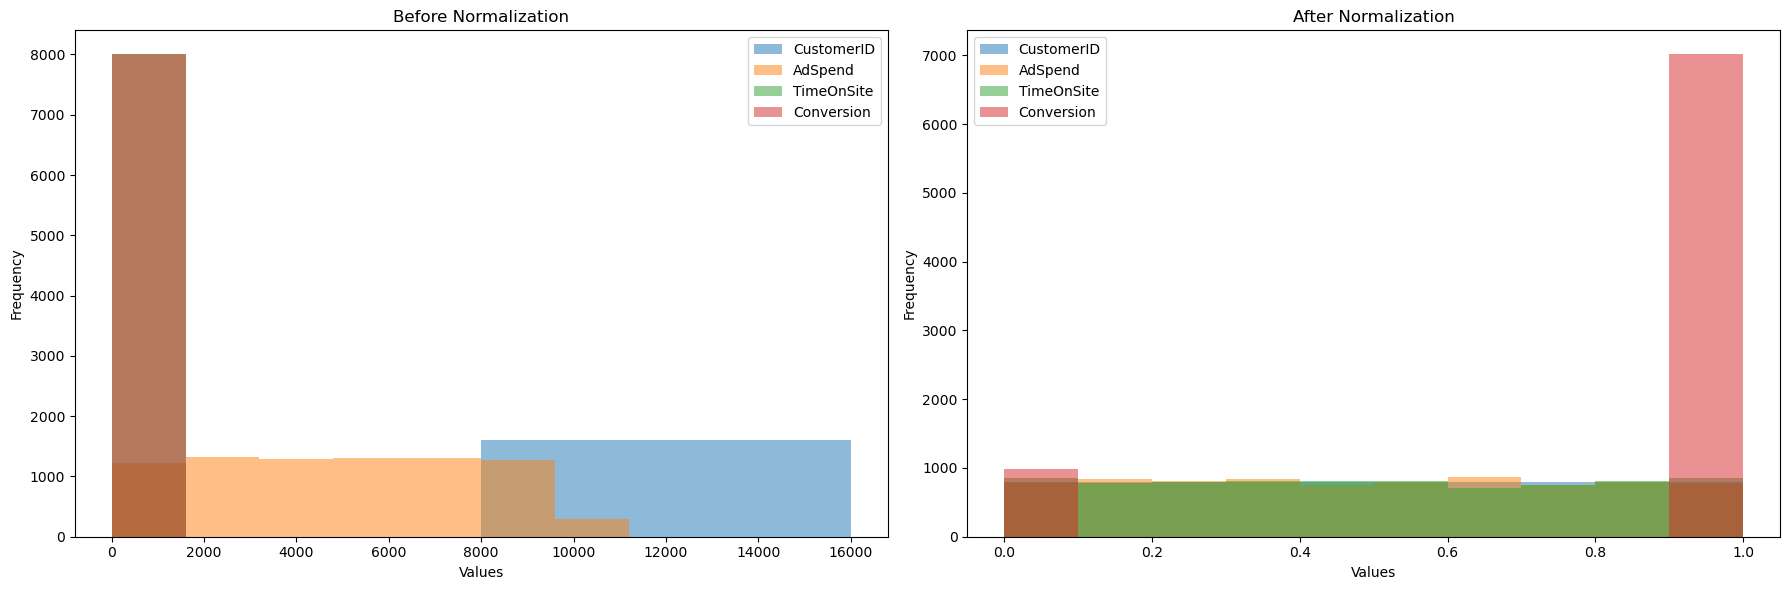

CustomerID    0.0
AdSpend       0.0
TimeOnSite    0.0
Conversion    0.0
dtype: float64


In [16]:
def normalize_p():
    columns = ["CustomerID","AdSpend", "TimeOnSite", "Conversion"]  

    df_1 = df[columns].copy()
    df_2_1 = df[columns].copy()

    for column in columns:
        df_2_1[column] = (df_2_1[column] - df_2_1[column].min()) / (df_2_1[column].max() - df_2_1[column].min())

    before = df_1
    after = df_2_1
    
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    before.plot(kind="hist", bins=10, alpha=0.5, ax=axs[0], title="Without Normalization", legend=True)
    axs[0].set_title("Before Normalization")
    axs[0].set_xlabel("Values")
    axs[0].legend()

    after.plot(kind="hist", bins=10, alpha=0.5, ax=axs[1], title="With Normalization", legend=True)
    axs[1].set_title("After Normalization")
    axs[1].set_xlabel("Values")
    axs[1].legend()


    plt.tight_layout()
    plt.show()

    print(after.min())
    return after

data_p = normalize_p()

**Numpy**

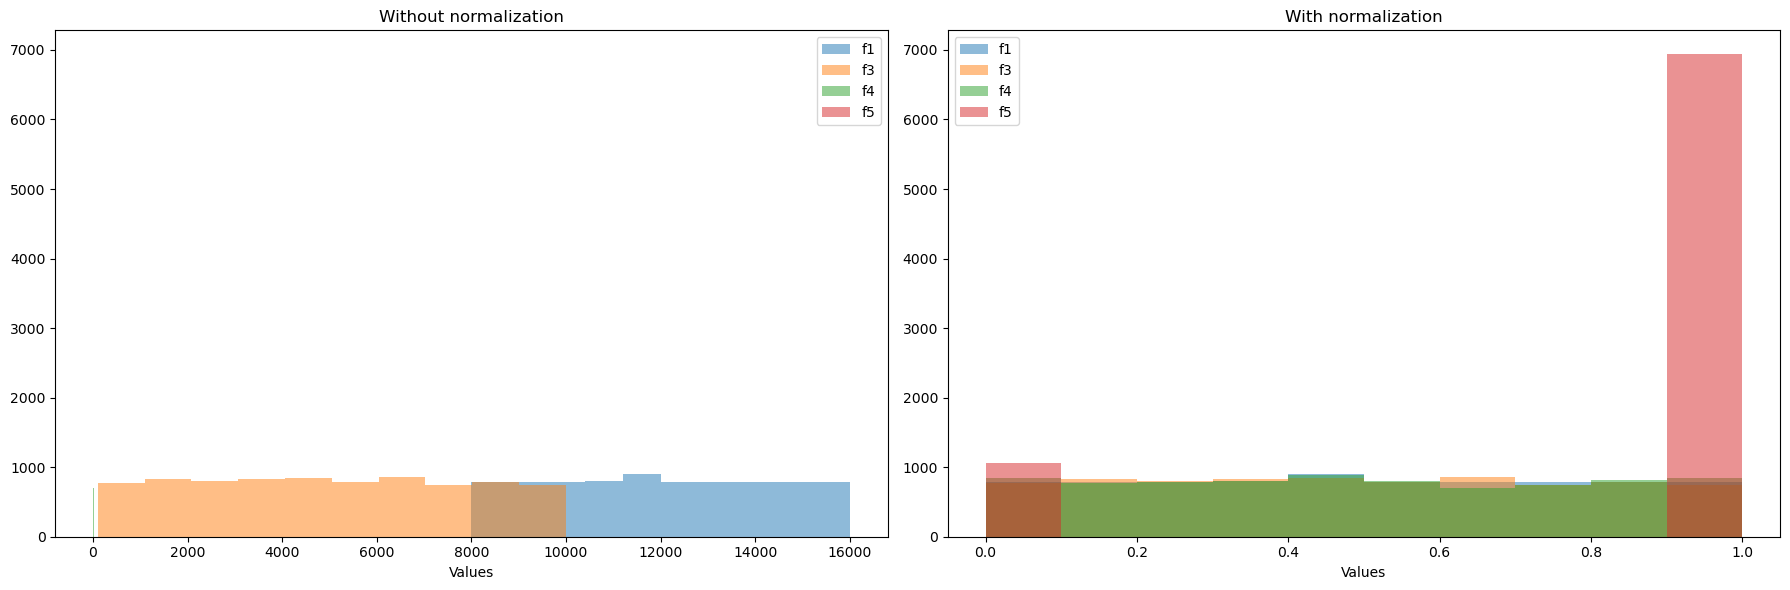

In [17]:
def normalize_np(data_np):
    columns = ["f1", "f3", "f4", "f5"]

    if data_np.dtype.names:  
        extracted_data = np.column_stack([data_np[col] for col in columns])
    else:  
        column_indices = [list(data_np.dtype.names).index(col) for col in columns]
        extracted_data = data_np[:, column_indices]

    normalized_data = extracted_data.astype(float).copy()
    
    for i in range(normalized_data.shape[1]):
        col_min = np.nanmin(normalized_data[:, i])  
        col_max = np.nanmax(normalized_data[:, i])  
        if col_max - col_min > 0:  
            normalized_data[:, i] = (normalized_data[:, i] - col_min) / (col_max - col_min)
        else:
            normalized_data[:, i] = 0  

    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    for i, col in enumerate(columns):
        axs[0].hist(extracted_data[:, i][~np.isnan(extracted_data[:, i])], bins=10, alpha=0.5, label=col)
    axs[0].set_title("Without normalization")
    axs[0].set_xlabel("Values")
    axs[0].legend()

    for i, col in enumerate(columns):
        axs[1].hist(normalized_data[:, i][~np.isnan(normalized_data[:, i])], bins=10, alpha=0.5, label=col)
    axs[1].set_title("With normalization")
    axs[1].set_xlabel("Values")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    return normalized_data

normalize_data = normalize_np(data_np)


### Standartization

**Pandas**

Mean after standardization:
CustomerID    0.000000e+00
AdSpend      -2.930989e-17
TimeOnSite   -3.819167e-17
Conversion    1.207923e-16
dtype: float64
Std deviation after standardization:
CustomerID    1.0
AdSpend       1.0
TimeOnSite    1.0
Conversion    1.0
dtype: float64


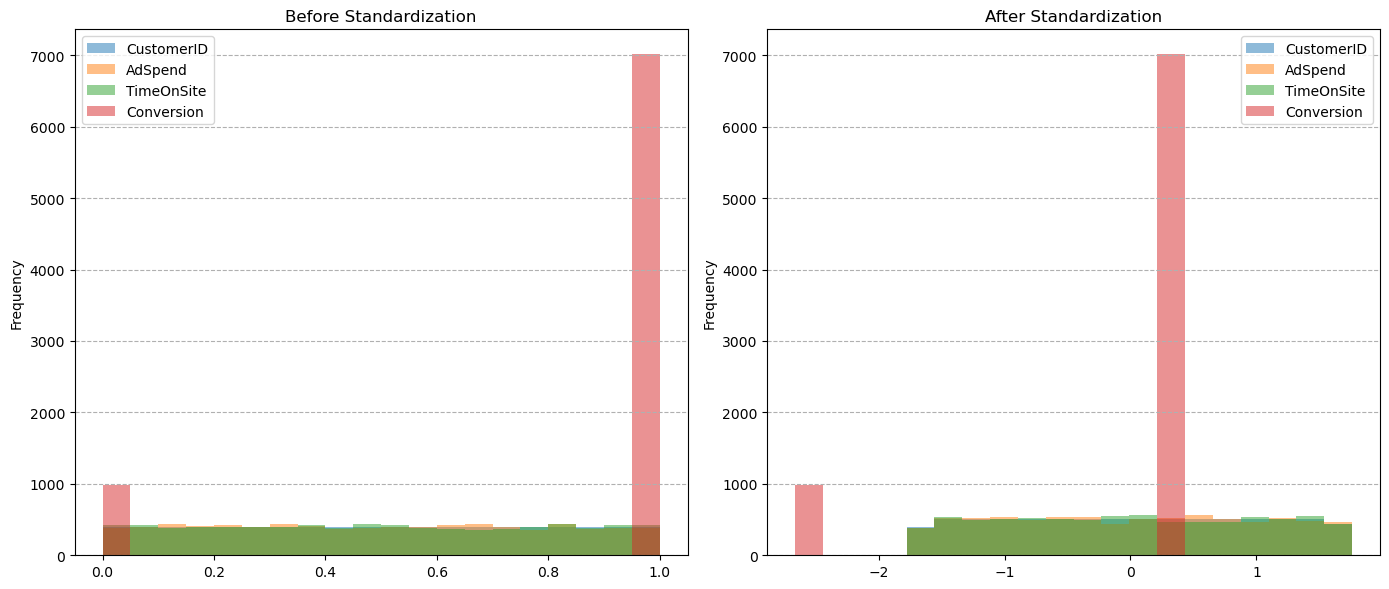

,CustomerID,AdSpend,TimeOnSite,Conversion
0,-1.731726,0.527451,-0.078264,0.375345
1,-1.731293,-0.388394,-0.561742,0.375345
2,-1.730860,-1.217219,1.434927,0.375345
3,-1.730427,-1.572008,1.646236,0.375345
4,-1.729994,-1.170844,1.481866,0.375345
...,...,...,...,...
7995,1.729994,1.239365,1.537309,-2.663884
7996,1.730427,-1.260142,-0.999620,-2.663884
7997,1.730860,-0.137916,1.629671,0.375345
7998,1.731293,1.576850,-0.910808,0.375345


In [18]:
def standardize_p(df):
    columns = ["CustomerID","AdSpend", "TimeOnSite", "Conversion"]  

    df_original = df[columns].copy()
    df_standardized = df[columns].copy()

    for column in columns:
        df_standardized[column] = (df_standardized[column] - df_standardized[column].mean()) / df_standardized[column].std()

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    df_original.plot(kind="hist", bins=20, alpha=0.5, ax=axs[0], legend=True)
    axs[0].legend(columns, fontsize=10)
    axs[0].set_title("Before Standardization")
    axs[0].grid(axis="y", linestyle="--")

    df_standardized.plot(kind="hist", bins=20, alpha=0.5, ax=axs[1], legend=True)
    axs[1].legend(columns, fontsize=10)
    axs[1].set_title("After Standardization")
    axs[1].grid(axis="y", linestyle="--")

    print("Mean after standardization:")
    print(df_standardized.mean())
    print("Std deviation after standardization:")
    print(df_standardized.std())

    plt.tight_layout()
    plt.show()

    return df_standardized

standardize_p(data_p)

**Numpy**

Mean of standardized data:
{'f1': -5.684341886080802e-17, 'f3': 1.3589129821411916e-16, 'f4': -1.0658141036401503e-17, 'f5': 1.2079226507921704e-16}
Std of standardized data:
{'f1': 1.0, 'f3': 1.0, 'f4': 1.0, 'f5': 0.9999999999999997}


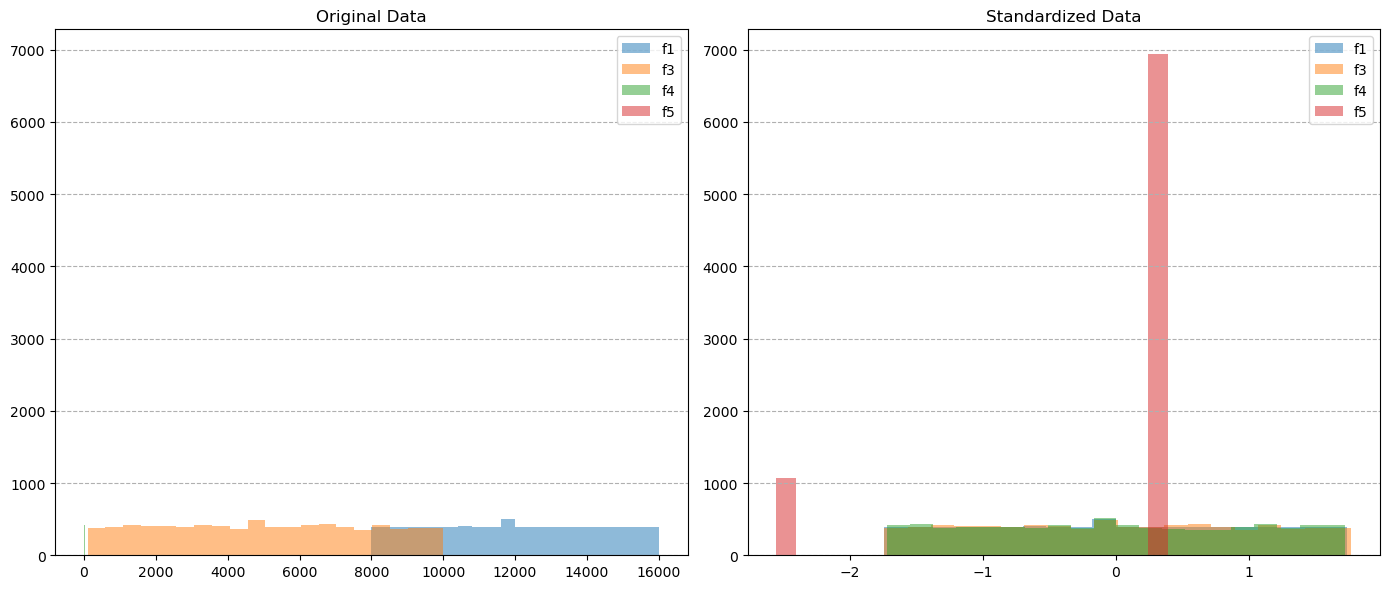

array([[-1.74418715e+00,  5.30434925e-01, -7.76414407e-02,
         3.91878621e-01],
       [-3.43786575e-04, -3.92201405e-01, -5.63597907e-01,
         3.91878621e-01],
       [-1.74331501e+00, -1.22717368e+00,  1.44330339e+00,
         3.91878621e-01],
       ...,
       [ 1.74306351e+00, -1.39865895e-01,  1.63904581e+00,
         3.91878621e-01],
       [ 1.74349958e+00,  1.58761692e+00, -9.14452259e-01,
         3.91878621e-01],
       [ 1.74393565e+00,  9.72640228e-01,  1.19815842e+00,
        -2.55181055e+00]])

In [19]:
def standardize_np(data_np):
    columns = ["f1", "f3", "f4", "f5"]  

    extracted_data = np.column_stack([data_np[col] for col in columns])

    standardized_data = extracted_data.copy().astype(float)
    for i in range(standardized_data.shape[1]):
        col = standardized_data[:, i]
        col_mean = np.mean(col)  
        col_std = np.std(col)    
        standardized_data[:, i] = (col - col_mean) / col_std 

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    for i, col_name in enumerate(columns):
        axs[0].hist(extracted_data[:, i], bins=20, alpha=0.5, label=col_name)
    axs[0].set_title("Original Data")
    axs[0].legend()
    axs[0].grid(axis="y", linestyle="--")

    for i, col_name in enumerate(columns):
        axs[1].hist(standardized_data[:, i], bins=20, alpha=0.5, label=col_name)
    axs[1].set_title("Standardized Data")
    axs[1].legend()
    axs[1].grid(axis="y", linestyle="--")

    print("Mean of standardized data:")
    print({columns[i]: np.mean(standardized_data[:, i]) for i in range(len(columns))})
    print("Std of standardized data:")
    print({columns[i]: np.std(standardized_data[:, i]) for i in range(len(columns))})

    plt.tight_layout()
    plt.show()

    return standardized_data

standardize_np(data_np)

Побудова графіка залежності одного integer/real атрибута від іншого. (через pandas)

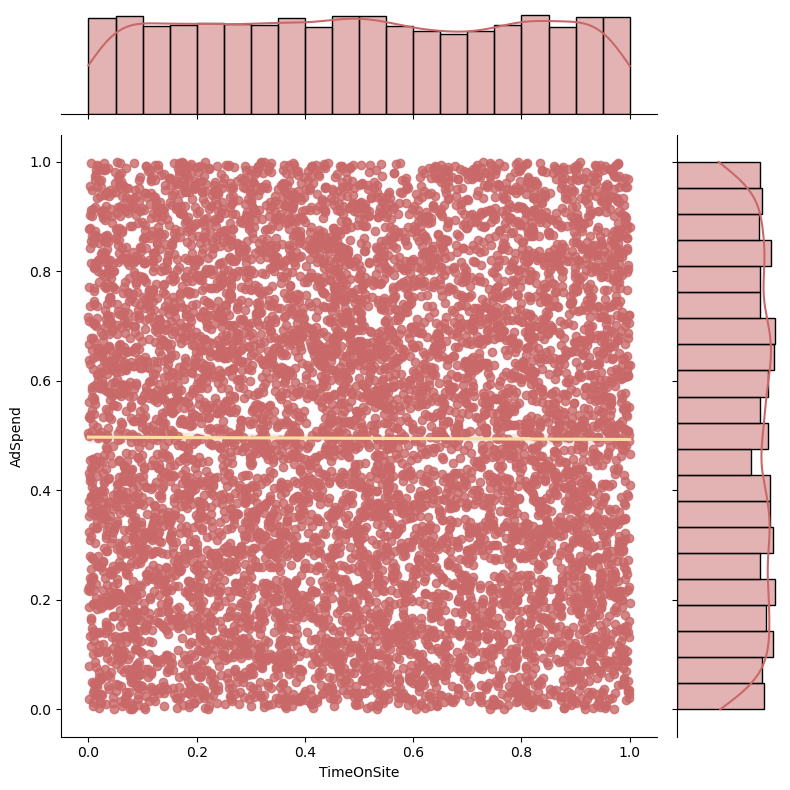

In [20]:
points = (201/255, 104/255, 104/255)  
line = (250/255, 223/255, 161/255) 

fig = sns.jointplot(x="TimeOnSite", y="AdSpend", data=data_p, kind="reg", height=8, color=points)
 
fig.ax_joint.lines[0].set_color(line)

plt.show()

Побудова графіка залежності одного integer/real атрибута від іншого. (через numpy)

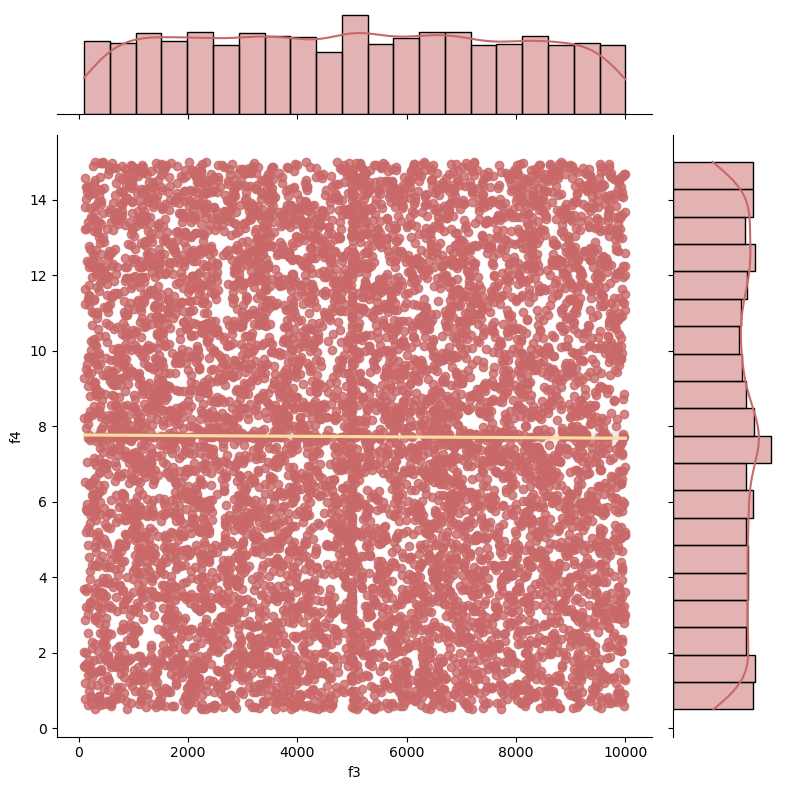

In [21]:
data_np_p = pd.DataFrame(data_np)
points = (201 / 255, 104 / 255, 104 / 255) 
line = (250 / 255, 223 / 255, 161 / 255)  

fig = sns.jointplot(x="f3", y="f4", data=data_np_p, kind="reg", height=8, color=points)

fig.ax_joint.lines[0].set_color(line)

plt.show()

Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real трибутів.

In [22]:
def pearson_corr(one, two):
    r, p_value = pearsonr(one, two)
    print(f"Pearson correlation coefficient for {one.name} & {two.name}: {r}")
    return r

def spearman_corr(one, two):
    r, p_value = spearmanr(one, two)
    print(f"Spearman correlation coefficient for {one.name} & {two.name}: {r}")
    return r

result = [("AdSpend", "TimeOnSite"), ("AdSpend", "Conversion"), ("TimeOnSite", "Conversion")]
results = []

for i in result:
    results.append({
        'One': i[0],
        'Two': i[1],
        'Pearson correlation': pearson_corr(data_p[i[0]], data_p[i[1]]),
        'Spearman correlation': spearman_corr(data_p[i[0]], data_p[i[1]])
    })

df_results = pd.DataFrame(results)

def color(val):
    color = "red" if val < 0 else "green"
    return f"color: {color}"

styled_df = df_results.style.applymap(color, subset=['Pearson correlation', 'Spearman correlation'])

styled_df

Pearson correlation coefficient for AdSpend & TimeOnSite: -0.0043354596409225215
Spearman correlation coefficient for AdSpend & TimeOnSite: -0.004581549141899207
Pearson correlation coefficient for AdSpend & Conversion: 0.12467206610398332
Spearman correlation coefficient for AdSpend & Conversion: 0.12452724801178065
Pearson correlation coefficient for TimeOnSite & Conversion: 0.12960882663036496
Spearman correlation coefficient for TimeOnSite & Conversion: 0.1298369172069251


/var/folders/d7/mv12n9yn7c1gy3kr948lcfth0000gn/T/ipykernel_14608/2954835181.py:28: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df_results.style.applymap(color, subset=['Pearson correlation', 'Spearman correlation'])


,One,Two,Pearson correlation,Spearman correlation
0,AdSpend,TimeOnSite,-0.004335,-0.004582
1,AdSpend,Conversion,0.124672,0.124527
2,TimeOnSite,Conversion,0.129609,0.129837


One Hot Encoding

In [24]:
def enc(one):
   print(pd.get_dummies(data_p, columns=[one], prefix=one))

enc("CustomerID")


       AdSpend  TimeOnSite  Conversion  CustomerID_0.0  \
0     0.646384    0.475735         1.0            True   
1     0.383781    0.334690         1.0           False   
2     0.146130    0.917177         1.0           False   
3     0.044401    0.978822         1.0           False   
4     0.159427    0.930870         1.0           False   
...        ...         ...         ...             ...   
7995  0.850513    0.947045         0.0           False   
7996  0.133823    0.206948         0.0           False   
7997  0.455601    0.973989         1.0           False   
7998  0.947281    0.232858         1.0           False   
7999  0.772245    0.846025         0.0           False   

      CustomerID_0.00012501562695336918  CustomerID_0.00025003125390673836  \
0                                 False                              False   
1                                  True                              False   
2                                 False                              

Провести візуалізацію багатовимірних даних

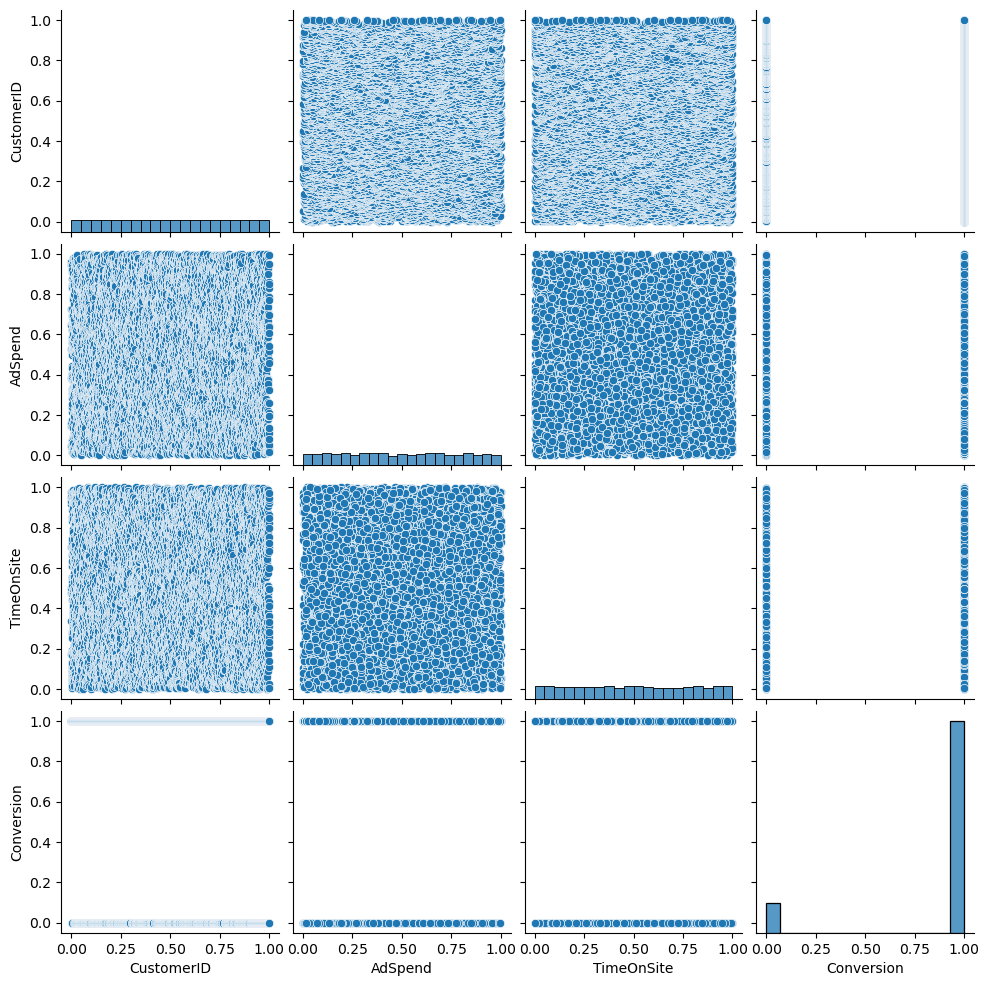

In [25]:
sns.pairplot(data_p)
plt.show()

Додаткове завдання

Linear Regression:
  MSE: 0.10
  R²: 0.06



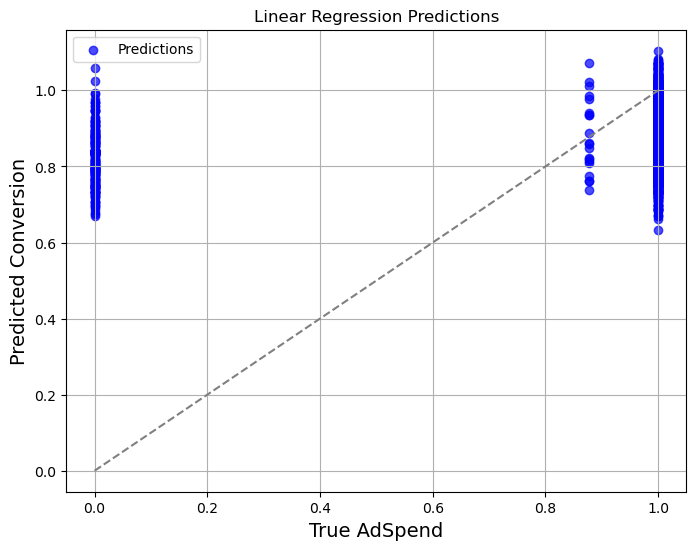

Decision Tree:
  MSE: 0.18
  R²: -0.71



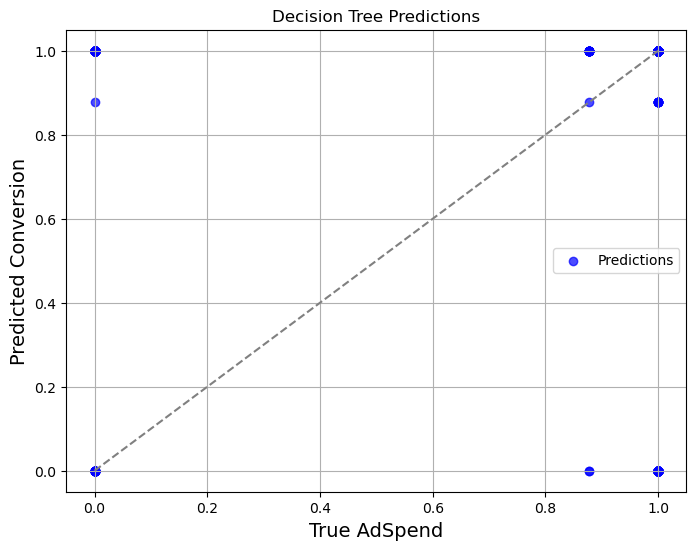

Random Forest:
  MSE: 0.10
  R²: 0.04



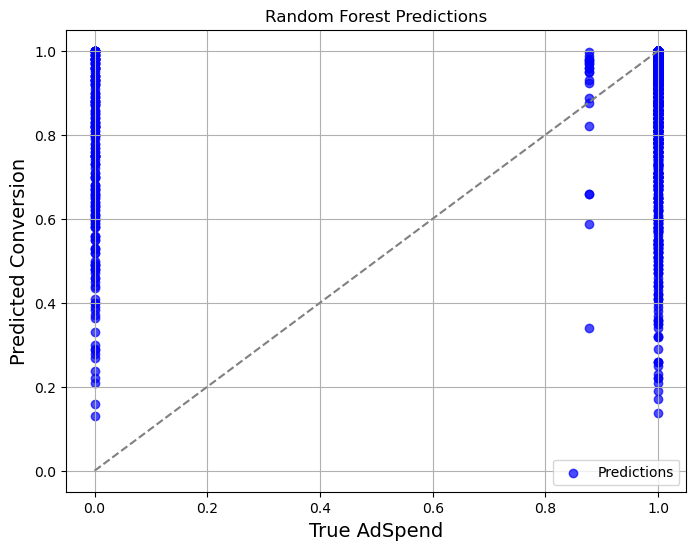

In [56]:
data_p = pd.get_dummies(data_p, columns=['CampaignChannel'], drop_first=True)  

data_known = data_p[data_p['Conversion'].notna()]  
data_unknown = data_p[data_p['Conversion'].isna()]  

X = data_known.drop('Conversion', axis=1) 
y = data_known['Conversion']  


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

results = {}

for name, model in models.items():
   
    model.fit(X_train, y_train)
    
    
    y_val_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)
    
    results[name] = {"MSE": mse, "R²": r2}
    
    
    print(f"{name}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  R²: {r2:.2f}")
    print()
    
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val, y_val_pred, alpha=0.7, label='Predictions', color='blue')
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='grey', linestyle='--')
    plt.xlabel('True AdSpend', fontsize=14)
    plt.ylabel('Predicted Conversion', fontsize=14)
    plt.title(f'{name} Predictions')
    plt.grid(True)
    plt.legend()
    plt.show()

best_model = models["Random Forest"]

if not data_unknown.empty:
    X_test = data_unknown.drop('Conversion', axis=1)  
    predicted_adspend = best_model.predict(X_test)
    data_unknown.loc[:, 'Conversion'] = predicted_adspend

data_final = pd.concat([data_known, data_unknown]).sort_index()

